In [1]:
import pandas

In [2]:
rates = pandas.read_excel("usd_rates.xlsx")

In [3]:
rates.head()

,nominal,data,curs,cdx
0,1,2017-01-10,59.8961,Доллар США
1,1,2017-01-11,59.9533,Доллар США
2,1,2017-01-12,60.1614,Доллар США
3,1,2017-01-13,59.4978,Доллар США
4,1,2017-01-14,59.3700,Доллар США


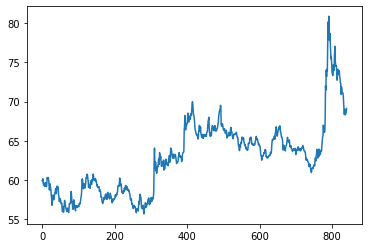

In [4]:
rates.curs.plot()

In [ ]:
# Спрогнозировать курс на 7 дней

In [ ]:
# взять за 28 дней назад => спрогнозировать на 7 дней вперед

По выдвинутой гипотезе в начале исследования, качество модели напрямую зависит от количества дней прогноза(future) и количества дней, данных для примера(past). Чем меньше дней надо предсказать, и чем больше дней дано для примера, тем точнее будет модель. Кроме того, в каждом частном методе погрешность будет зависеть от индивидуальных параметров, свойственных данному методу. 

In [ ]:
past = 112 #(изначально 28) 
future = 7 #(изначально 7)

In [ ]:
start = past # Начинаем рассмотрение с 28ого дня
end = len(rates.curs) - future # Заканчиваем рассмотрение на 7 дне с конца

In [ ]:
end-start

722

In [ ]:
dataframe = []
for day in range(start, end):
    past_data = list(rates.curs[(day-past):day]) # 28 чисел
    future_data = list(rates.curs[day:day+future]) # 7 чисел
    dataframe.append(past_data+future_data)
    # Взять 28 дней в прошлом
    # Взять 7 дней в будущем
    # все это сложить в одну таблицу в удобном (для модели) виде
    

In [ ]:
past_columns = []
for i in range(past):
    past_columns.append(f"past_{i}")

In [ ]:
future_columns = []
for i in range(future):
    future_columns.append(f"future_{i}")

In [ ]:
usd = pandas.DataFrame(dataframe, columns=past_columns+future_columns)

In [ ]:
X = usd[past_columns] # Входные данные, ТО на основе чего мы пытаемся сделать прогноз
Y = usd[future_columns] # Выходные данные, ТО что мы пытаемся спрогнозировать

In [ ]:
# Тренировочная выборка, это та, на которой мы тренируем модель, "УЧЕБНИК"
X_train = X[:-10] # "Задачи Учебника"
Y_train = Y[:-10] # "Ответы на задачи учебника"

In [ ]:
# Тестовая (проверочная) выборка, это та на который мы проверим качество обучения модели, "Экзамен"
X_test = X[-10:] # Задачи экзамена
Y_test = Y[-10:] # Ответы на задчи экзамена

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression() # Создается объект модели

In [ ]:
linreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_test

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,...,past_102,past_103,past_104,past_105,past_106,past_107,past_108,past_109,past_110,past_111
712,63.8430,63.7101,63.7637,64.0239,63.9722,64.1005,64.0817,64.4097,64.1401,64.1948,...,72.7263,73.9719,74.1169,73.8725,73.4326,73.5819,73.9298,73.2056,72.9798,72.3918
713,63.7101,63.7637,64.0239,63.9722,64.1005,64.0817,64.4097,64.1401,64.1948,63.8135,...,73.9719,74.1169,73.8725,73.4326,73.5819,73.9298,73.2056,72.9798,72.3918,72.3381
714,63.7637,64.0239,63.9722,64.1005,64.0817,64.4097,64.1401,64.1948,63.8135,63.7185,...,74.1169,73.8725,73.4326,73.5819,73.9298,73.2056,72.9798,72.3918,72.3381,70.9240
715,64.0239,63.9722,64.1005,64.0817,64.4097,64.1401,64.1948,63.8135,63.7185,63.7244,...,73.8725,73.4326,73.5819,73.9298,73.2056,72.9798,72.3918,72.3381,70.9240,71.8804
716,63.9722,64.1005,64.0817,64.4097,64.1401,64.1948,63.8135,63.7185,63.7244,63.5788,...,73.4326,73.5819,73.9298,73.2056,72.9798,72.3918,72.3381,70.9240,71.8804,71.5962
717,64.1005,64.0817,64.4097,64.1401,64.1948,63.8135,63.7185,63.7244,63.5788,63.5653,...,73.5819,73.9298,73.2056,72.9798,72.3918,72.3381,70.9240,71.8804,71.5962,71.1408
718,64.0817,64.4097,64.1401,64.1948,63.8135,63.7185,63.7244,63.5788,63.5653,63.2257,...,73.9298,73.2056,72.9798,72.3918,72.3381,70.9240,71.8804,71.5962,71.1408,71.0635
719,64.4097,64.1401,64.1948,63.8135,63.7185,63.7244,63.5788,63.5653,63.2257,62.5544,...,73.2056,72.9798,72.3918,72.3381,70.9240,71.8804,71.5962,71.1408,71.0635,71.1012
720,64.1401,64.1948,63.8135,63.7185,63.7244,63.5788,63.5653,63.2257,62.5544,62.7686,...,72.9798,72.3918,72.3381,70.9240,71.8804,71.5962,71.1408,71.0635,71.1012,70.7520
721,64.1948,63.8135,63.7185,63.7244,63.5788,63.5653,63.2257,62.5544,62.7686,62.5326,...,72.3918,72.3381,70.9240,71.8804,71.5962,71.1408,71.0635,71.1012,70.7520,69.7114


In [ ]:
firstDay = X_test.head(1)

In [ ]:
firstDayReal = Y_test.head(1)

In [ ]:
firstDay

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,...,past_102,past_103,past_104,past_105,past_106,past_107,past_108,past_109,past_110,past_111
712,63.843,63.7101,63.7637,64.0239,63.9722,64.1005,64.0817,64.4097,64.1401,64.1948,...,72.7263,73.9719,74.1169,73.8725,73.4326,73.5819,73.9298,73.2056,72.9798,72.3918


In [ ]:
prediction = linreg.predict(firstDay)

In [ ]:
prediction

array([[72.80495585, 72.5570674 , 72.29748378, 72.02754893, 71.5245962 ,
        71.23204968, 70.13530695]])

In [ ]:
firstDayReal

,future_0,future_1,future_2,future_3,future_4,future_5,future_6
712,72.3381,70.924,71.8804,71.5962,71.1408,71.0635,71.1012


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(prediction[0], firstDayReal.iloc[0])

0.6380849864752106

In [ ]:
import matplotlib.pyplot as plt

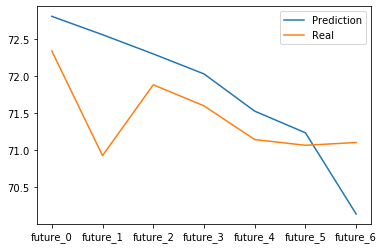

In [ ]:
plt.plot(prediction[0], label="Prediction")
plt.plot(firstDayReal.iloc[0], label="Real")
plt.legend()

MAE = 0.6712452055346299


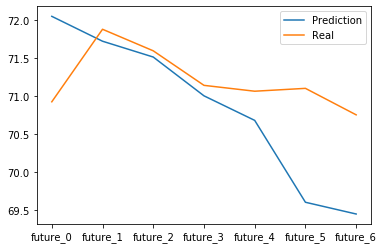

In [ ]:
prediction = linreg.predict([X_test.iloc[1]])
real = Y_test.iloc[1]
mae = mean_absolute_error(prediction[0], real)
print(f"MAE = {mae}")
plt.plot(prediction[0], label="Prediction")
plt.plot(real, label="Real")
plt.legend()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

MAE = 0.4479214285714233


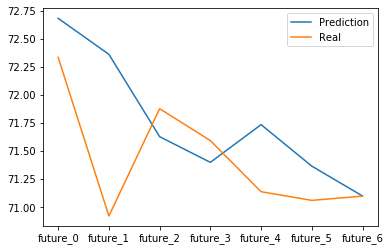

In [ ]:
prediction = knn.predict([X_test.iloc[0]])
real = Y_test.iloc[0]
mae = mean_absolute_error(prediction[0], real)
print(f"MAE = {mae}")
plt.plot(prediction[0], label="Prediction")
plt.plot(real, label="Real")
plt.legend()

In [ ]:
from sklearn.neural_network import MLPRegressor

Изначально предполагалось что качество работы модели MLPRegressor, напрямую зависит от количества итераций (перменная max_iter)и от количества слоев и нейронов в 
них(hidden_layer_sizes), предполагалось что увеличение количества итераций, равно как и увеличение количества слоев и нейронов в них, окажет положительное влияние на точность 
регрессии(коэффициент MAE).

In [ ]:
mlp = MLPRegressor(max_iter=3000, hidden_layer_sizes=(300,300,300), random_state=42)

При значениях past = 40, future = 2 и при значениях модели MLPRegressor(max_iter=1200, hidden_layer_sizes=(150,150,150), random_state=42)было получено максимальное значение MAE = 0.11181836835714876. В ходе эксперимента было установлено, что качество в большей мере зависит от параметра от future, чем меньшее количество дней необходимо предсказать модели, тем точнее она это делает, также важен параметр past, количество дней на основе которого система делает прогноз. Желательно, чтобы данный показатель был около 40, поскольку мной было установлено что в противном случае качество модели будет хуже(например при past = 60, future = 2, значение  MAE = 0.16615500863770194).

При значениях past = 56, future = 7(в задании не было четко сказано, нужно сделать прогноз на 7 дней или на любое количество, при котором будет низкая погрешность поэтому я учел оба варианта) и при значениях модели MLPRegressor(max_iter=3000, hidden_layer_sizes=(300,300,300), random_state=42)было получено минимальное значение MAE = 0.6886939592446453. 


Было экспериментальным образом установлено, что переменная past влияет положительно на точность модели, причем ее влияние значительней, чем влияние таких параметров модели MLPRegressor, как количество итераций (перменная max_iter) и от количества слоев и нейронов в них(hidden_layer_sizes). Если данные параметры находятся в обычных значениях или привышают их позитивное влияние практически незаметно, а если сильно ниже изначально установленных, то сразу становится очевидным сильное негативное влияние на точность всей модели. Кроме того, в результате опытов была выдвинута гипотеза, если переменная past кратна переменной future (в данном примере future=7) то точность модели значительно выше. Например, при параметрах  past = 110, future = 7 , max_iter=3000, hidden_layer_sizes=(300,300,300), random_state=42 точность получилась модели получилась MAE = 0.8752510227845879, а при параметрах past = 112, future = 7, max_iter=3000, hidden_layer_sizes=(300,300,300), random_state=42,  точность получилась модели получилась значильно выше MAE = 0.22645176866183597.


In [ ]:
mlp.fit(X_train, Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(300, 300, 300), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=3000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

MAE = 0.22645176866183597


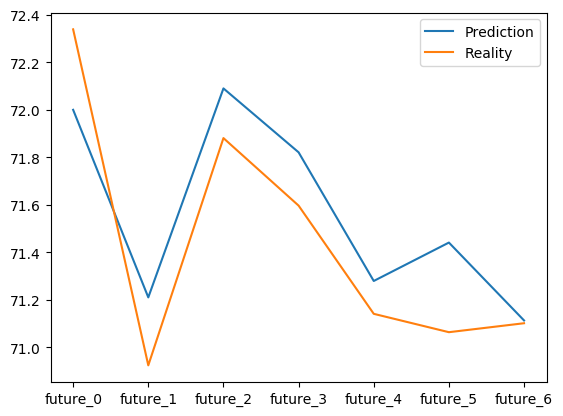

In [ ]:
prediction = mlp.predict([X_test.iloc[0]])
real = Y_test.iloc[0]
mae = mean_absolute_error(prediction[0], real)
print(f"MAE = {mae}")
plt.plot(prediction[0], label="Prediction")
plt.plot(real, label="Reality")
plt.legend()

In [ ]:
1.77/2

0.885

In [ ]:
import numpy as np
from sklearn.datasets import load_linnerud
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge

In [ ]:
mor = MultiOutputRegressor(Ridge(max_iter=3000, normalize=True, random_state=42))# Создаем регрессор с заданными параметрами random_state=54, max_iter=3000
#, normalize=True для единообразия всех моделей.

In [ ]:
mor.fit(X_train, Y_train)

MultiOutputRegressor(estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                     max_iter=3000, normalize=True,
                                     random_state=42, solver='auto',
                                     tol=0.001),
                     n_jobs=None)

MAE = 0.590274523365896


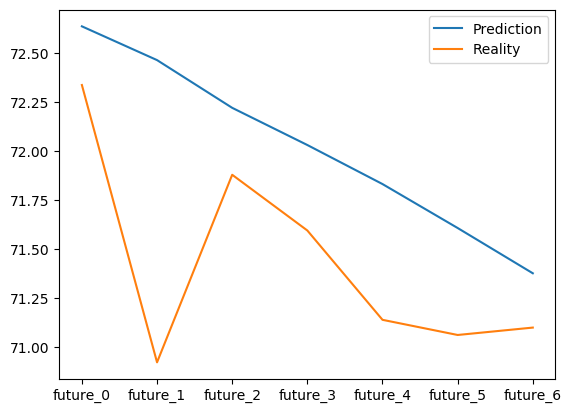

In [ ]:
prediction = mor.predict([X_test.iloc[0]])
real = Y_test.iloc[0]
mae = mean_absolute_error(prediction[0], real)
print(f"MAE = {mae}")
plt.plot(prediction[0], label="Prediction")
plt.plot(real, label="Reality")
plt.legend()

In [ ]:
from sklearn import linear_model

In [ ]:
lm = linear_model.Ridge(alpha=1, random_state=54, normalize=True, max_iter=3000 ) # Создаем ридж-регрессию  с заданными параметрами random_state=54, max_iter=3000, normalize=True для единообразия всех моделей.

В ходе эксперимента был сделан вывод, что если выставить нормализацию модели (normalize=True), это уменьшит погрешность модели, это сохраняет актуальность и для других регрессоров. 

In [ ]:
lm.fit(X_train, Y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=3000, normalize=True,
      random_state=54, solver='auto', tol=0.001)

MAE = 0.590274523365898


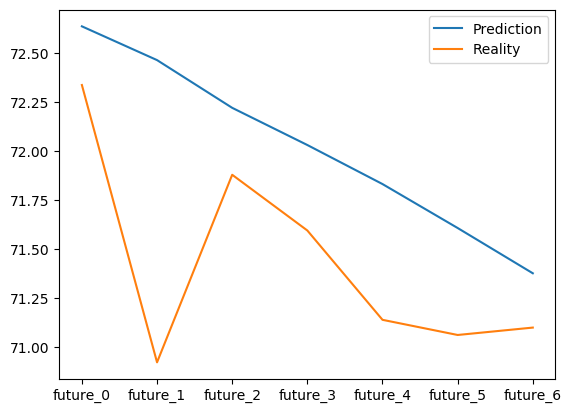

In [ ]:
prediction = lm.predict([X_test.iloc[0]])
real = Y_test.iloc[0]
mae = mean_absolute_error(prediction[0], real)
print(f"MAE = {mae}")
plt.plot(prediction[0], label="Prediction")
plt.plot(real, label="Reality")
plt.legend()

In [ ]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

In [ ]:
kernel = DotProduct() + WhiteKernel()


In [ ]:
gpr = GaussianProcessRegressor(kernel=kernel, random_state=54, normalize_y=True)# Запускаем модель с заданными параметрами random_state=54, normalize=True для единообразия всех моделей.

In [ ]:
gpr.fit(X_train, Y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=DotProduct(sigma_0=1) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=0, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=54)

MAE = 0.6157306007362605


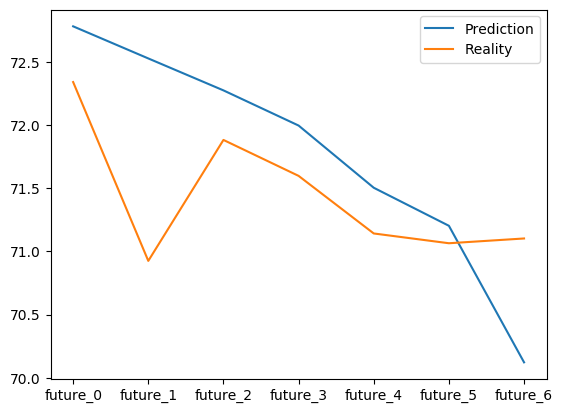

In [ ]:
prediction = gpr.predict([X_test.iloc[0]])
real = Y_test.iloc[0]
mae = mean_absolute_error(prediction[0], real)
print(f"MAE = {mae}")
plt.plot(prediction[0], label="Prediction")
plt.plot(real, label="Reality")
plt.legend()

**Выводы:**

In [ ]:
mae_info= pandas.read_excel("mae.xlsx",index_col=0)

In [ ]:
mae_info

,MAE
Method,
MLPRegressor,0.226452
MultiOutputRegressor,0.590275
RidgeRegression,0.590275
GaussianProcessRegressor,0.615731
KNeighborsRegressor,0.447921
LinReg,0.671245


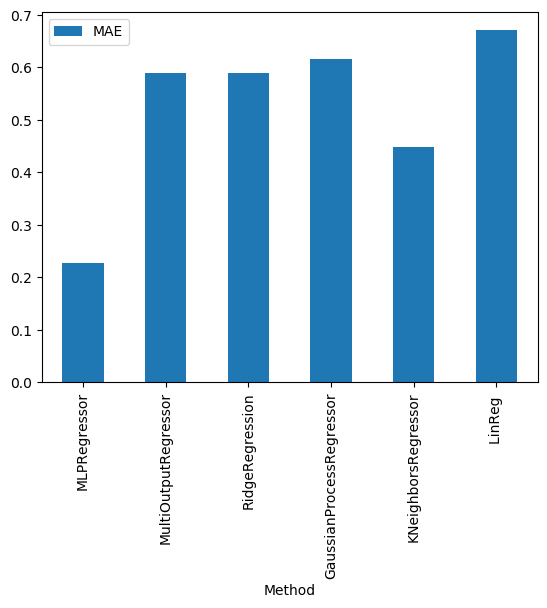

In [ ]:
mae_info.plot(kind="bar")

Выдвинутая вначале теория подтвердилась лишь частично, погрешность (MAE) в большей степени зависит от  количества дней, данных для обучения(past) и в меньшей степени зависит от частных параметров каждой отдельной модели, однако некоторые параметры, как например нормализация, в некоторых примерах оказывает положительное влияние на погрешность. В результате опытов была выдвинута теория о том что, если переменная past кратна переменной future (в данном примере future=7) то точность модели будет значительно выше. 

Кроме того, по результатам опытов, были сделаны выводы о качестве разных моделей (для точности были использованы сходные настройки и одинаковые исходные данные), наиболее точными методами (самым низким коэффициентом MAE) оказались Multi-layer Perceptron regressor (Многослойный перцептрон) с коэффициентом MAE 0.226452 и Regression based on k-nearest neighbors (Метод k-ближайших соседей) с коэффициентом MAE 0.447921, а самой неточной оказалась модель  обычной линейной регрессии с коэффициентом MAE 0.671245.